In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import zscore
import pingouin as pg

### 1. Carregar e Visualizar os dados

In [82]:
# Carregar csv e criar dataset
df_irrigacao = pd.read_csv('./dados_de_irrigacao.csv')

In [83]:
# Checar estrutura do dataset
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [84]:
df_irrigacao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [85]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


### 2. Análise Exploratória dos Dados (EDA)

<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

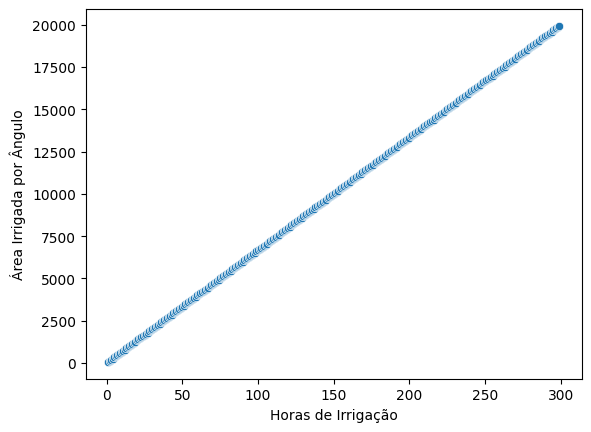

In [86]:
# Plot de dispersão
sns.scatterplot(data=df_irrigacao, x='Horas de Irrigação', y='Área Irrigada por Ângulo')



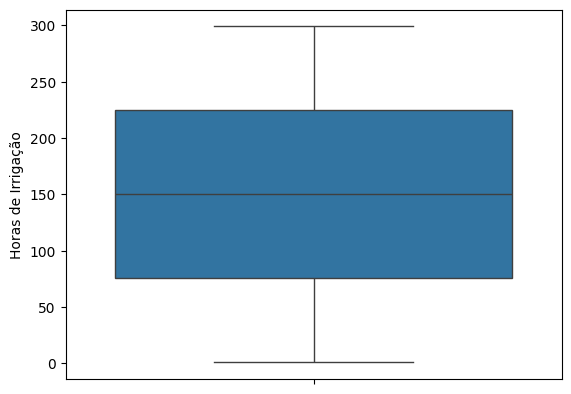

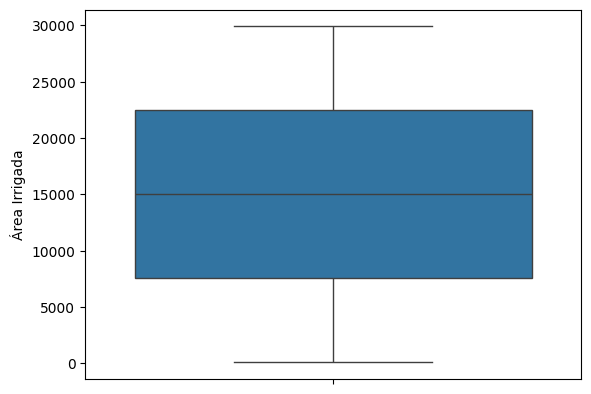

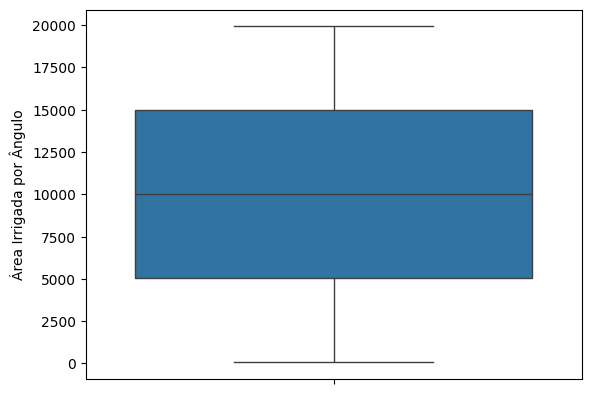

In [87]:
# Verificar outilers
# Plot boxplot
sns.boxplot(df_irrigacao, y='Horas de Irrigação')
plt.show()

sns.boxplot(df_irrigacao, y='Área Irrigada')
plt.show()

sns.boxplot(df_irrigacao, y='Área Irrigada por Ângulo')
plt.show()

<Axes: >

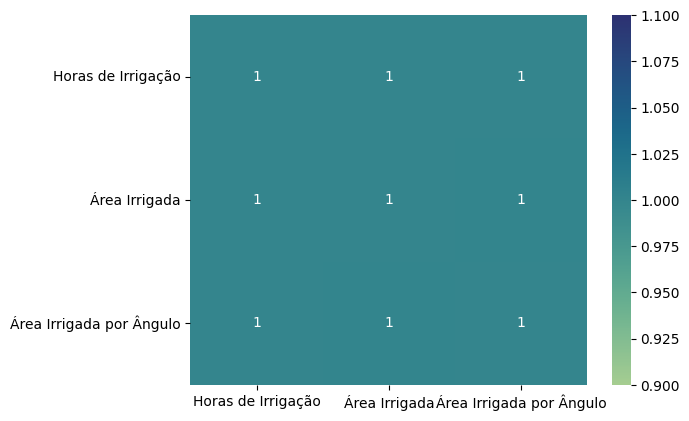

In [88]:
# Correlação - Pearson
sns.heatmap(df_irrigacao.corr('pearson'), annot=True, cmap='crest')

<Axes: >

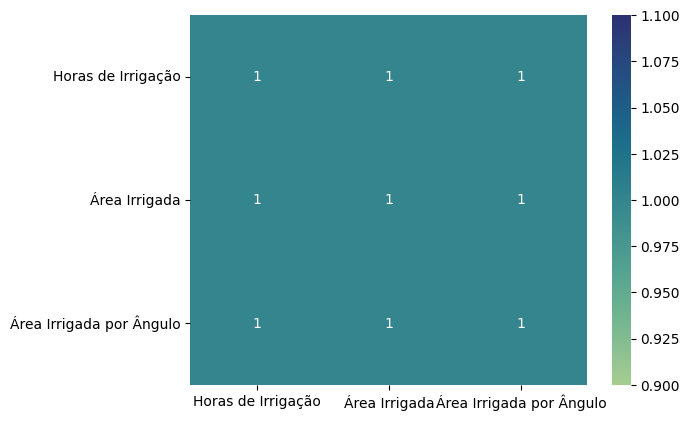

In [89]:
# Correlação - Spearman
sns.heatmap(df_irrigacao.corr('spearman'), annot=True, cmap='crest')

### 3. Construção do Modelo de Regressão Linear

In [100]:
# Dividir dados em conjunto de treino e teste
X = df_irrigacao['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigacao['Área Irrigada por Ângulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Instanciar modelo a ser treinado
reg_model = LinearRegression()

# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [102]:
reg_model.intercept_[0]

1.8189894035458565e-12

In [103]:
# Impressão da equação da reta
print("y = {}x + {}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

y = 66.66666666666667x + 1.8189894035458565e-12


### 4. Avaliação do Modelo

In [104]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [105]:
# Calcular métrica MSE (Mean Squared Error)
print("MSE: ", mean_squared_error(y_test, y_pred))

# Calcular métrica MAE (Mean Absolute Error)
print("MAE:", mean_absolute_error(y_test, y_pred))


MSE:  8.248757082420076e-24
MAE: 2.559848629365054e-12


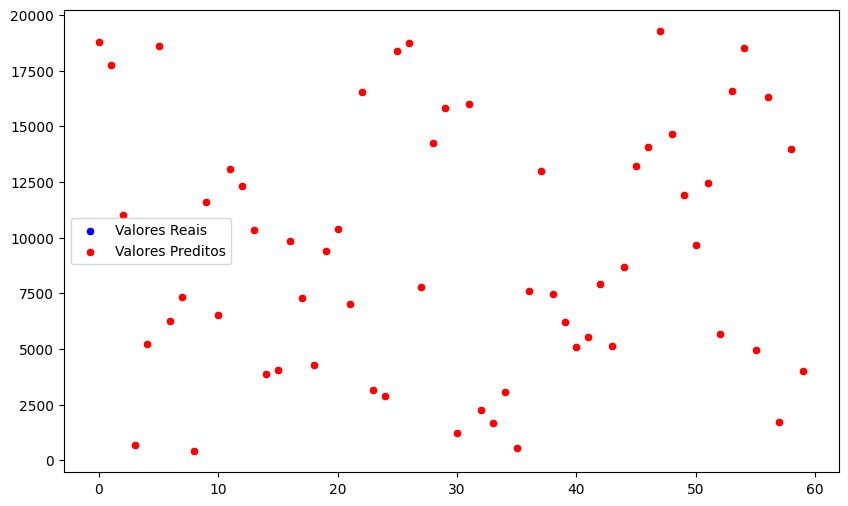

In [106]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### 5. Análise de Residuos

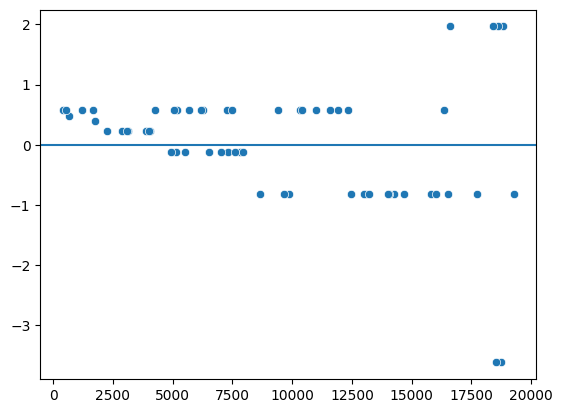

In [107]:
# calcular residuos
residuos = y_test - y_pred

# Calcular residuos padronizados
residuos_std = zscore(residuos)

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

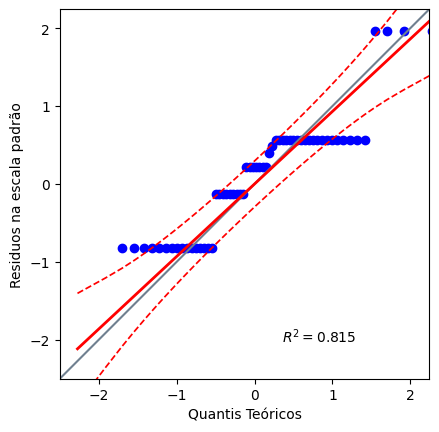

In [108]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuição normal

# Para evitar erro de font
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

### 6. Predição de Exemplo

In [109]:
# Predição para o exemplo de 15 horas
area_predita = reg_model.predict([[15]])
print(f"Para 15 horas de irrigação, a área irrigada por ângulo previsa é {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo previsa é 1000.0000000000019
